## The following API provides access to the latest remote job listings from a diverse range of industries and companies.
### Investigation includes:
    a) Companies with most available roles
    b) Job Titles Wordcloud
    c) Job Industry 
    d) Job Level
    e) Job Type
    f) Job description wordcloud

In [1]:
import requests
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# Remote Jobs API - JobIcy
url = 'https://jobicy.com/api/v2/remote-jobs'
response = requests.get(url)
response

<Response [200]>

In [3]:
response.json()

{'apiVersion': '2.0',
 'documentationUrl': 'https://jobi.cy/apidocs',
 'friendlyNotice': "We appreciate your use of Jobicy API in your projects! Please note that our API access is designed primarily to facilitate broader distribution of our content. We kindly request that you refrain from distributing Jobicy’s job listings to any external job platforms, such as Jooble, Google Jobs, and LinkedIn, among others. To ensure that Jobicy is credited as the original source across various platforms, content in the feeds is published with a slight delay. As our data doesn't change frequently, accessing the Feed a few times daily is sufficient and recommended. Be advised that excessive querying may lead to restricted access. Thank you for understanding and cooperating!",
 'jobCount': 50,
 'xRayHash': 'xID_65fc9086f04099.43024560',
 'clientKey': 'key_65fc9086f040f',
 'lastUpdate': '2024-03-21 09:29:46',
 'jobs': [{'id': 104407,
   'url': 'https://jobicy.com/jobs/104407-senior-accountant-17',
   'j

In [4]:
data = response.json()
data.keys()
df = pd.DataFrame(data['jobs'])
df.head()

,id,url,jobSlug,jobTitle,companyName,companyLogo,jobIndustry,jobType,jobGeo,jobLevel,jobExcerpt,jobDescription,pubDate,annualSalaryMin,annualSalaryMax,salaryCurrency
0,104407,https://jobicy.com/jobs/104407-senior-accounta...,104407-senior-accountant-17,Senior Accountant,Uscreen,https://jobicy.com/data/server-nyc0409/galaxy/...,[Finance &amp; Legal],[full-time],Anywhere,Senior,"Uscreen is a profitably growing, bootstrapped,...","<p>Uscreen is a profitably growing, bootstrapp...",2024-03-21 09:29:46,NaN,NaN,NaN
1,103268,https://jobicy.com/jobs/103268-brand-designer-3,103268-brand-designer-3,Brand Designer,Uscreen,https://jobicy.com/data/server-nyc0409/galaxy/...,[Design &amp; Creative],[full-time],USA,Any,"Uscreen is a profitable, growing, &amp; bootst...","<p>Uscreen is a profitable, growing, &amp; boo...",2024-03-21 09:28:16,NaN,NaN,NaN
2,103270,https://jobicy.com/jobs/103270-mid-level-conte...,103270-mid-level-content-strategist,Mid-Level Content Strategist,Bixal,https://jobicy.com/data/server-nyc0409/galaxy/...,[Copywriting &amp; Content],[full-time],USA,Midweight,Bixal has an exciting opportunity to help acce...,"<div class=""section page-centered"" data-qa=""jo...",2024-03-21 09:25:05,NaN,NaN,NaN
3,98227,https://jobicy.com/jobs/98227-language-special...,98227-language-specialist-american-english,Language Specialist - American English,DeepL,https://jobicy.com/data/server-nyc0409/galaxy/...,[Product &amp; Operations],[full-time],"Europe, Germany, Netherlands, UK",Any,DeepL&#8230;is Germany&#8217;s best-known AI c...,"<p class=""sc-1npqnwg-4 sc-1npqnwg-5 sc-1uwf3m5...",2024-03-21 09:24:13,NaN,NaN,NaN
4,104403,https://jobicy.com/jobs/104403-head-of-content-6,104403-head-of-content-6,Head of Content,Close,https://jobicy.com/data/server-nyc0409/galaxy/...,[Copywriting &amp; Content],[full-time],USA,Any,"Close is a bootstrapped, profitable, 100% remo...","<div class=""section page-centered"" data-qa=""jo...",2024-03-21 02:55:31,NaN,NaN,NaN


In [5]:
df.info()
# No null values
# Drop annualSalaryMin, annualSalaryMax, salaryCurrency -- 60% percent of data is NULL. Columns will not contribute to new insights
# For the purposes of this EDA, drop url,jobSlug, id, companyLogo, jobDescription(same as jobExcert here), jobGeo, pubDate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               50 non-null     int64 
 1   url              50 non-null     object
 2   jobSlug          50 non-null     object
 3   jobTitle         50 non-null     object
 4   companyName      50 non-null     object
 5   companyLogo      50 non-null     object
 6   jobIndustry      50 non-null     object
 7   jobType          50 non-null     object
 8   jobGeo           50 non-null     object
 9   jobLevel         50 non-null     object
 10  jobExcerpt       50 non-null     object
 11  jobDescription   50 non-null     object
 12  pubDate          50 non-null     object
 13  annualSalaryMin  20 non-null     object
 14  annualSalaryMax  20 non-null     object
 15  salaryCurrency   20 non-null     object
dtypes: int64(1), object(15)
memory usage: 6.4+ KB


In [6]:
df_new = df.copy()
df_new.drop(['id', 'url', 'jobSlug', 'companyLogo', 'jobDescription', 'jobGeo', 'pubDate', 'annualSalaryMin', 'annualSalaryMax', 'salaryCurrency'], axis=1, inplace=True)
df_new.head()

,jobTitle,companyName,jobIndustry,jobType,jobLevel,jobExcerpt
0,Senior Accountant,Uscreen,[Finance &amp; Legal],[full-time],Senior,"Uscreen is a profitably growing, bootstrapped,..."
1,Brand Designer,Uscreen,[Design &amp; Creative],[full-time],Any,"Uscreen is a profitable, growing, &amp; bootst..."
2,Mid-Level Content Strategist,Bixal,[Copywriting &amp; Content],[full-time],Midweight,Bixal has an exciting opportunity to help acce...
3,Language Specialist - American English,DeepL,[Product &amp; Operations],[full-time],Any,DeepL&#8230;is Germany&#8217;s best-known AI c...
4,Head of Content,Close,[Copywriting &amp; Content],[full-time],Any,"Close is a bootstrapped, profitable, 100% remo..."


In [7]:
df_new['Job_Type'] = df_new.jobType.astype(str).str[2:-2]
df_new.drop('jobType', axis=1, inplace=True)

In [9]:
df_new['Job_Industry'] = df_new['jobIndustry'].astype(str).str[2:-2].apply(lambda x: x.split(';'))
df_new.drop('jobIndustry', axis=1, inplace=True)

In [10]:
df_new.head()

,jobTitle,companyName,jobLevel,jobExcerpt,Job_Type,Job_Industry
0,Senior Accountant,Uscreen,Senior,"Uscreen is a profitably growing, bootstrapped,...",full-time,"[Finance &amp, Legal]"
1,Brand Designer,Uscreen,Any,"Uscreen is a profitable, growing, &amp; bootst...",full-time,"[Design &amp, Creative]"
2,Mid-Level Content Strategist,Bixal,Midweight,Bixal has an exciting opportunity to help acce...,full-time,"[Copywriting &amp, Content]"
3,Language Specialist - American English,DeepL,Any,DeepL&#8230;is Germany&#8217;s best-known AI c...,full-time,"[Product &amp, Operations]"
4,Head of Content,Close,Any,"Close is a bootstrapped, profitable, 100% remo...",full-time,"[Copywriting &amp, Content]"


In [11]:
# Companies with the most roles
df_new['companyName'].value_counts().nlargest()

companyName
Teaching.com    3
Kraken          3
Ascensus        3
Uscreen         2
Harness         2
Name: count, dtype: int64

In [12]:
# Job Type
df_new['Job_Type'].value_counts()

Job_Type
full-time    48
part-time     1
contract      1
Name: count, dtype: int64

In [13]:
# Job Level
df_new['jobLevel'].value_counts()

jobLevel
Any          32
Senior       16
Midweight     1
Director      1
Name: count, dtype: int64

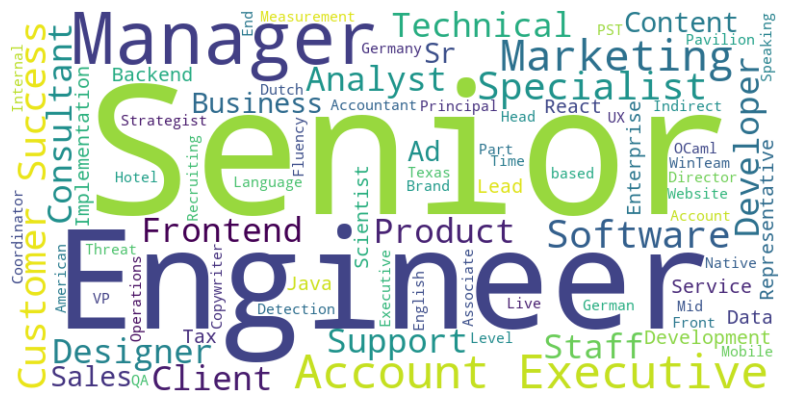

In [19]:
# Job Title WordCloud

text = ' '.join(df['jobTitle'])

wordcloud = WordCloud(width=800, height=400, background_color='white', prefer_horizontal = 0.9).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

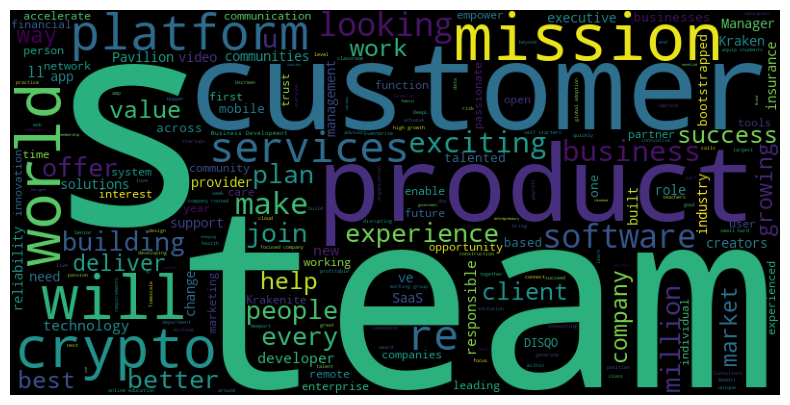

In [18]:
# Job Description

text = ' '.join(df['jobExcerpt'])

wordcloud = WordCloud(width=800, height=400, background_color='black', prefer_horizontal = 0.9).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()